In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

link_bilgisi = "https://www.tcmb.gov.tr/kurlar/today.xml"
gelen_yanit = requests.get(url=link_bilgisi)

print(gelen_yanit.text)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="19.12.2025" Date="12/19/2025"  Bulten_No="2025/241" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>42.6532</ForexBuying>
			<ForexSelling>42.7301</ForexSelling>
			<BanknoteBuying>42.6234</BanknoteBuying>
			<BanknoteSelling>42.7942</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>28.1112</ForexBuying>
			<ForexSelling>28.2945</ForexSelling>
			<BanknoteBuying>27.9819</BanknoteBuying>
			<BanknoteSelling>28.4643</BanknoteSelling>
				<CrossRateUSD>1.5137</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit

In [2]:
tree = ET.parse(urlopen(link_bilgisi))

root = tree.getroot()

liste = []

liste.append(root.findall('Currency'))


In [3]:
for i in liste[0]:
  currencyCode = i.get('Kod')
  banknoteBuying = i.find("BanknoteSelling").text
  banknoteSelling = i.find("BanknoteBuying").text

  if currencyCode == "USD":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("USD Banka Alış Satış Arasındaki Kur Farkı ->", result)

  if currencyCode == "EUR":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", result)

USD 42.7942 42.6234
USD Banka Alış Satış Arasındaki Kur Farkı -> 0.17079999999999984
EUR 50.1266 49.9265
EUR Banka Alış Satış Arasındaki Kur Farkı -> 0.20010000000000616


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="19.12.2025" Date="12/19/2025"  Bulten_No="2025/241" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>42.6532</ForexBuying>
			<ForexSelling>42.7301</ForexSelling>
			<BanknoteBuying>42.6234</BanknoteBuying>
			<BanknoteSelling>42.7942</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>28.1112</ForexBuying>
			<ForexSelling>28.2945</ForexSelling>
			<BanknoteBuying>27.9819</BanknoteBuying>
			<BanknoteSelling>28.4643</BanknoteSelling>
				<CrossRateUSD>1.5137</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit

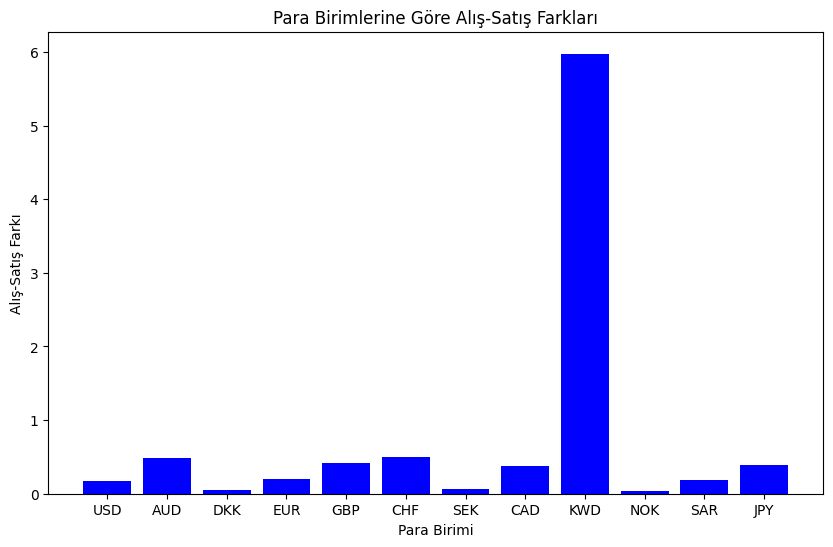

In [4]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Veri kaynağının linki
baglanti_adresi = "https://www.tcmb.gov.tr/kurlar/today.xml"

# Web sitesinden XML verisini alıyoruz
gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text)  # Verinin içeriğini kontrol amaçlı yazdırıyoruz

# XML verisini parse (çözümleme) ediyoruz
agac = ET.parse(urlopen(baglanti_adresi))
kok = agac.getroot()

# Para birimlerini saklayacağımız listeyi oluşturuyoruz
para_birimleri = []

# Tüm para birimlerini bulup listeye ekliyoruz
para_birimleri.append(kok.findall('Currency'))

# Para birimleri üzerinde döngü ile işlem yapıyoruz
for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')  # Para birimi kodunu alıyoruz
    alisFiyati = i.find("BanknoteSelling").text  # Alış fiyatını alıyoruz
    satisFiyati = i.find("BanknoteBuying").text  # Satış fiyatını alıyoruz

    # USD için işlem yapıyoruz
    if paraBirimiKodu == "USD":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("USD Banka Alış Satış Arasındaki Kur Farkı ->", fark)

    # EUR için işlem yapıyoruz
    if paraBirimiKodu == "EUR":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", fark)

# Verileri pandas DataFrame olarak saklama
veri = {
    'Para Birimi': [],
    'Alış Fiyatı': [],
    'Satış Fiyatı': [],
    'Fark': []
}

for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')
    alisFiyati = i.find("BanknoteSelling").text
    satisFiyati = i.find("BanknoteBuying").text
    if alisFiyati is not None and satisFiyati is not None:
        fark = float(alisFiyati) - float(satisFiyati)
        veri['Para Birimi'].append(paraBirimiKodu)
        veri['Alış Fiyatı'].append(float(alisFiyati))
        veri['Satış Fiyatı'].append(float(satisFiyati))
        veri['Fark'].append(fark)

df = pd.DataFrame(veri)

# Pandas DataFrame verilerini görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('Para Birimlerine Göre Alış-Satış Farkları')
plt.show()

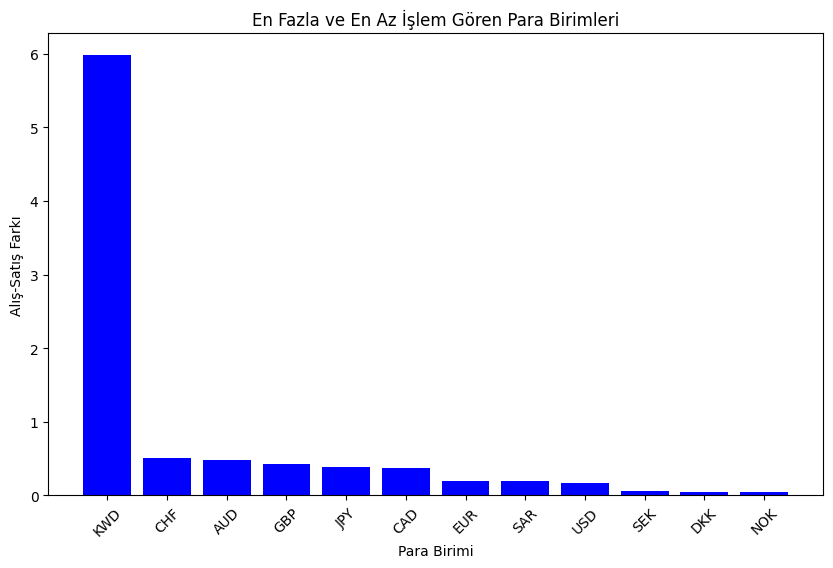

In [5]:
# Verileri alış-satış farkına göre büyükten küçüğe sıralıyoruz
df_sorted = df.sort_values(by='Fark', ascending=False)

# Pandas DataFrame verilerini görselleştirme (Sıralanmış Hali)
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Para Birimi'], df_sorted['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('En Fazla ve En Az İşlem Gören Para Birimleri')
plt.xticks(rotation=45)  # Para birimi isimlerinin daha iyi görünmesi için
plt.show()

In [6]:
# CSV dosyasına kaydetme

df_sorted.to_csv('kur_verileri_siralama-30042025.csv', index=False)

print("Veriler 'kur_verileri_siralama-30042025.csv' dosyasına kaydedildi.")


Veriler 'kur_verileri_siralama-30042025.csv' dosyasına kaydedildi.


In [7]:
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi (ücretsiz sürüm için)
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler (şehir adı, API anahtarı ve metrik sistem)
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme örnekleri
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

    except requests.exceptions.RequestException as err:
        print("Hata oluştu: " + str(err))

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ") # API KEY sizin OpenWeatherMap üyeliğiniz sonrasında oluşturulan anahtardır.

    # Hava durumu bilgilerini alma fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)


Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: eaafaf00a169671eaf146416a23e48fe
Hava Durumu Bilgisi - istanbul
Sıcaklık: 10.09 °C
Nem Oranı: 93%
Açıklama: broken clouds


Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: eaafaf00a169671eaf146416a23e48fe
Hava Durumu Bilgisi - istanbul
Sıcaklık: 10.09 °C
Nem Oranı: 93%
Açıklama: broken clouds


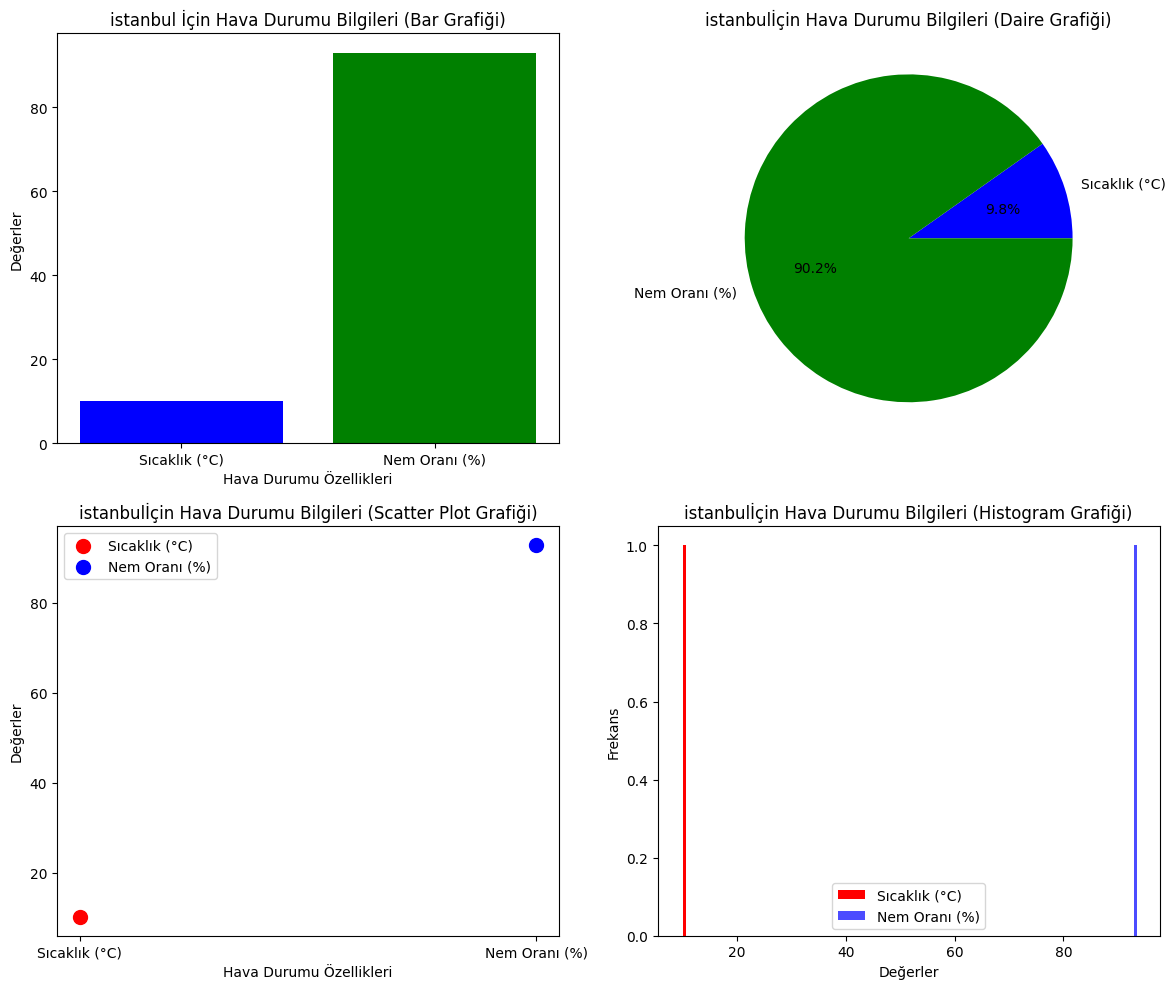

In [8]:
# pip install requests, matplotlib

import requests
import matplotlib.pyplot as plt

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

        # Hava durumu verilerini bir dictionary'de saklıyoruz
        veri = {
            "Sıcaklık (°C)": hava_durumu['main']['temp'],
            "Nem Oranı (%)": hava_durumu['main']['humidity']
        }

        # Bar Grafiği
        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)  # 2x2 grid, 1. grafik
        plt.bar(veri.keys(), veri.values(), color=['blue', 'green'])
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(sehir + " İçin Hava Durumu Bilgileri (Bar Grafiği)")

        # Daire Grafiği (Pie Chart)
        plt.subplot(2, 2, 2)  # 2x2 grid, 2. grafik
        plt.pie(veri.values(), labels=veri.keys(), autopct='%1.1f%%', colors=['blue', 'green'])
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Daire Grafiği)")

        # Scatter Plot (Dağılım Grafiği) - İki Farklı Renk
        plt.subplot(2, 2, 3)  # 2x2 grid, 3. grafik
        plt.scatter(['Sıcaklık (°C)'], [veri['Sıcaklık (°C)']], color='red', s=100, label='Sıcaklık (°C)')
        plt.scatter(['Nem Oranı (%)'], [veri['Nem Oranı (%)']], color='blue', s=100, label='Nem Oranı (%)')
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Scatter Plot Grafiği)")
        plt.legend()

        # Histogram - Ayrı Ayrı Gösterim
        plt.subplot(2, 2, 4)  # 2x2 grid, 4. grafik
        plt.hist([veri['Sıcaklık (°C)']], bins=2, color='red', label='Sıcaklık (°C)')
        plt.hist([veri['Nem Oranı (%)']], bins=2, color='blue', label='Nem Oranı (%)', alpha=0.7)
        plt.xlabel('Değerler')
        plt.ylabel('Frekans')
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Histogram Grafiği)")
        plt.legend()

        plt.tight_layout()
        plt.show()

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ") # API KEY sizin OpenWeatherMap üyeliğiniz sonrasında oluşturulan anahtardır.

    # Hava durumu bilgilerini alma ve görselleştirme fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)